<a href="https://colab.research.google.com/github/raj-vijay/dl/blob/master/2_Logistic_Regression_for_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic Regression for Image Classification**

In the practical lab folder we will be developing a Logistic Regression model that will perform classification on a basic image dataset, called the Digits dataset. Each sample in the dataset is an 8x8 image representing a handwritten digit (see below for some samples). There are 1797 8x8 images. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. As logistic regression is a binary classifier we will be building a model to differentiate between two different digits. (This is a very basic image classification problem. We will be covering much more complex and realistic image classification tasks later in the module).

In [0]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

Define the Sigmoid Function

In [0]:
# Sigmoid function
def logistic(x):
  return 1.0 / (1.0 + np.exp(-1.0*x))

In [0]:
def hypothesisLogistic(X, coefficients, bias):
    
    # array of zeros. Length is same as number of training rows.  
    predictedValues = np.zeros(X.shape[0])
    
    # for each feature multiple the X training data by the appropriate 
    # coefficient and add to to predictedvalues
    for num in range(len(coefficients)):
        predictedValues += coefficients[num] * X[:, num]
    
    # finally add the current bias to each of the predicted values
    predictedValues += bias
    
    logisticPredicitons = logistic(predictedValues)
    
    return logisticPredicitons

Define Gradient Descent

In [0]:
def gradient_descent_log(bias, coefficients, alpha, X, Y, max_iter):

    length = len(Y)
    
    # array is used to store change in cost function for each iteration of GD
    errorValues = []
    
    for num in range(0, max_iter):
        
        # Calculate predicted y values for current coefficient and bias values 
        predictedY = hypothesisLogistic(X, coefficients, bias)
        

        # calculate gradient for bias
        biasGrad =    (1.0/length) *  (np.sum( predictedY - Y))
        
        #update bias using GD update rule
        bias = bias - (alpha*biasGrad)
        
        # for loop to update each coefficient value in turn
        for coefNum in range(len(coefficients)):
            
            # calculate the gradient of the coefficient
            gradCoef = (1.0/length)* (np.sum( (predictedY - Y)*X[:, coefNum]))
            
            # update coefficient using GD update rule
            coefficients[coefNum] = coefficients[coefNum] - (alpha*gradCoef)
        
        # Cross Entropy Error 
        cost = np.average(((-1*Y)*(np.log(predictedY)))- ((1-Y)*(np.log(1-predictedY))))

        errorValues.append(cost)

    
    # plot the cost for each iteration of gradient descent
    plt.plot(errorValues)
    plt.show()
    
    return bias, coefficients


Calculate Accuracy

In [0]:
def calculateAccuracy(bias, coefficients, X_test, y_test):
    
    # Get all predicted values for the text set
    predictedYValues = hypothesisLogistic(X_test, coefficients, bias)
   
    # Logistic regression is a probabilistic classifier.
    # If the probability is less than 0.5 set class to 0
    # If probability is greater than 0.5 set class to 1 
    predictedYValues[predictedYValues <= 0.5] = 0
    predictedYValues[predictedYValues > 0.5] = 1

    print ("Final Accuracy: ", sum(predictedYValues==y_test)/len(y_test))

Define Logistic Regression

In [0]:

def logisticRegression(X_train, y_train, X_test, y_test):

    # set the number of coefficients equal to the number of features
    coefficients = np.zeros(X_train.shape[1])
    bias = 0.0
   
    alpha = 0.001 # learning rate
    
    max_iter=200

    # call gredient decent, and get intercept(bias) and coefficents
    bias, coefficients = gradient_descent_log(bias, coefficients, alpha, X_train, y_train, max_iter)
    
    calculateAccuracy(bias, coefficients, X_test, y_test)
    

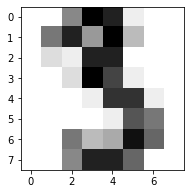

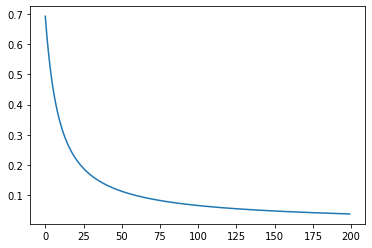

Final Accuracy:  0.9908256880733946


In [8]:
digits = datasets.load_digits()

# Display one of the images to the screen
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[3], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

# Load the feature data and the class labels
X_digits = digits.data
y_digits = digits.target

# The logistic regression model will differentiate between two digits
# Code allows you specify the two digits and extract the images 
# related to these digits from the dataset
indexD1 = y_digits==1
indexD2 = y_digits==7
allindices = indexD1 | indexD2
X_digits = X_digits[allindices]
y_digits = y_digits[allindices]
 

# We need to make sure that we conveert the labels to 
# 0 and 1 otherwise our cross entropy won't work 
lb = preprocessing.LabelBinarizer()
y_digits = lb.fit_transform(y_digits)
y_digits  =y_digits.flatten()

n_samples = len(X_digits)


# Seperate data in training and test
# Training data 
X_train = X_digits[:int(.7 * n_samples)]
y_train = y_digits[:int(.7 * n_samples)]

# Test data
X_test = X_digits[int(.7 * n_samples):]
y_test = y_digits[int(.7 * n_samples):]

   
logisticRegression(X_train, y_train, X_test, y_test)
